In [1]:
import numpy as np
from PIL import Image, ImageOps
from objectreader import ObjModel
import graphicsfunction as gf
import objectreader as nf

folder = f'img2/'
WIDTH = 1920
HEIGHT = 1080
DEFAULT_COLOR = (255, 255, 255)
BACKROUND_COLOR = (30, 30, 40)

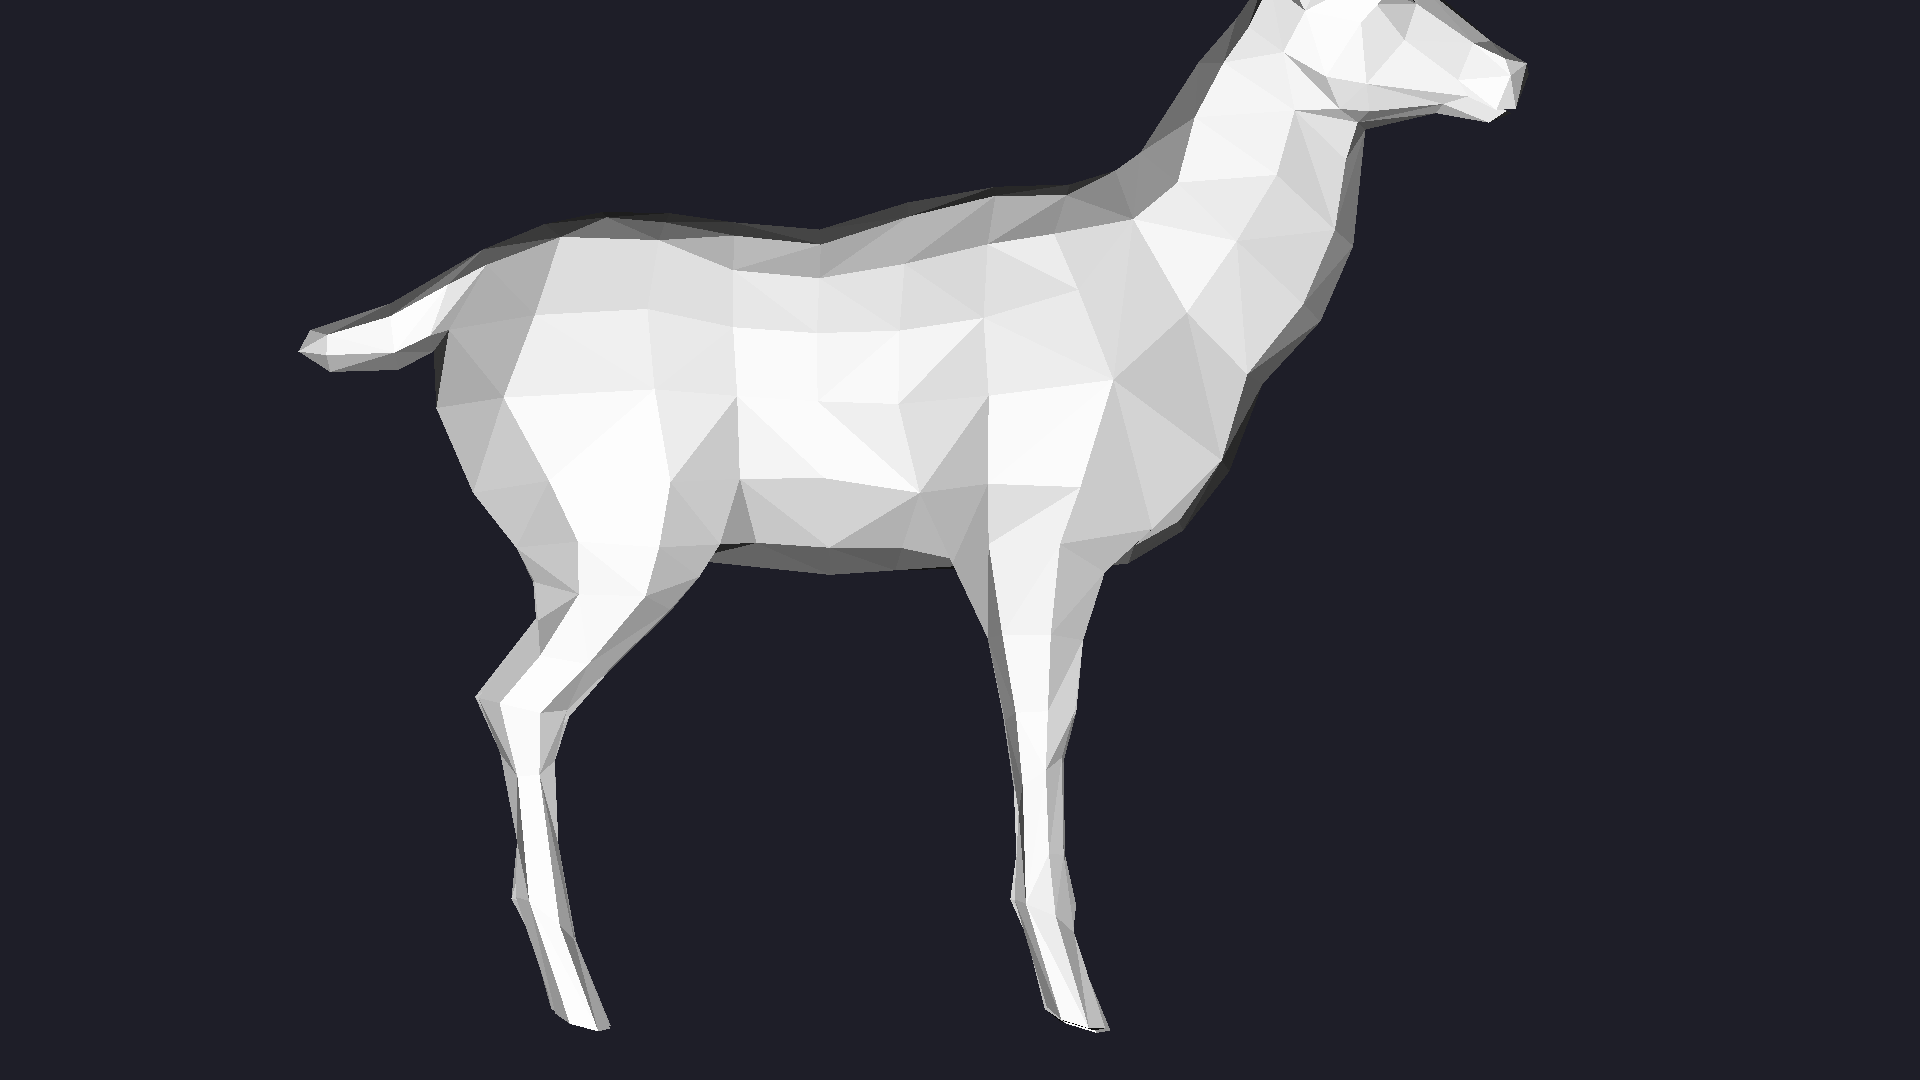

In [2]:
obj = ObjModel()
obj.readModel('model/model_2.obj')

obj.moveObj((0, 0, 1000))
for frame in range(0, 1):
    ar = np.full((WIDTH, HEIGHT, 3), BACKROUND_COLOR, dtype=np.uint8)
    zBuffer = np.full((WIDTH, HEIGHT), fill_value=np.inf, dtype=float)
    
    for pol in obj.polygons:
        vertexs = obj.getVertexFromPolygon(pol)
        n_old = gf.getNormal(vertexs)

        n = gf.getNormal(vertexs)
        alpha = np.dot(n_old, [0, 0, 1]) / (np.linalg.norm(n_old))
        alpha_new = np.dot(n, [0, 0, 1]) / (np.linalg.norm(n))
        if alpha < 0:
            color = (
                DEFAULT_COLOR[0] * (1 - alpha),
                DEFAULT_COLOR[1] * (1 - alpha),
                DEFAULT_COLOR[2] * (1 - alpha))
            gf.drawTriangle(ar, vertexs, 0, 0, color, zBuffer)
    img = ImageOps.flip(Image.fromarray(np.transpose(ar, (1, 0, 2)), mode="RGB"))
    img.save(folder + f"a_{frame}.jpg")
img

In [3]:
obj = ObjModel()
obj.readModel('model/model_2.obj')
scale, move = obj.scaleObjToImg(WIDTH, HEIGHT, scaleFactor=0.8)

for frame in range(0, 1):
    ar = np.full((WIDTH, HEIGHT, 3), BACKROUND_COLOR, dtype=np.uint8)
    zBuffer = np.full((WIDTH, HEIGHT), fill_value=1000000, dtype=int)

    obj.rotateObj(0, 360, 0)

    for pol in obj.polygons:
        vertexs = nf.movePol(obj.getVertexFromPolygon(pol), scale, move)
        n = gf.getNormal(vertexs)
        alpha = np.dot(n, [0, 0, 1]) / (np.linalg.norm(n))
        if alpha < 0:
            color = (
                DEFAULT_COLOR[0] * (1 - 0.5 * alpha), DEFAULT_COLOR[1] * (1 - alpha),
                DEFAULT_COLOR[2] * (1 - 0.1 * alpha))
            gf.drawTriangle(ar, vertexs, color, zBuffer)

AttributeError: 'ObjModel' object has no attribute 'scaleObjToImg'